# Farklı Veri Setleri ile Karşılaştırma

## SVHN veri seti

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# SVHN veri setini yükleme
svhn = fetch_openml('SVHN', version=1)

# Veriyi özellikler (X) ve etiketler (y) olarak ayırma
X, y = svhn['data'], svhn['target']

# Veriyi normalize etme
X = X / 255.0

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini eğitme
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
print("Lojistik Regresyon Doğruluğu:", log_reg_accuracy)

# Destek Vektör Makineleri (SVM) modelini eğitme
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
print("SVM Doğruluğu:", svm_accuracy)

# Rastgele Orman modelini eğitme
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print("Rastgele Orman Doğruluğu:", rf_accuracy)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 6))
models = ['Lojistik Regresyon', 'SVM', 'Rastgele Orman']
accuracies = [log_reg_accuracy, svm_accuracy, rf_accuracy]
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Doğruluk')
plt.title('Farklı Sınıflandırma Algoritmalarının Performansı')
plt.ylim(0.0, 1.0)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Farklı Veri Setlerinin Farklı Sınıflandırma Algoritmları ile Karşılaştırılması

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning

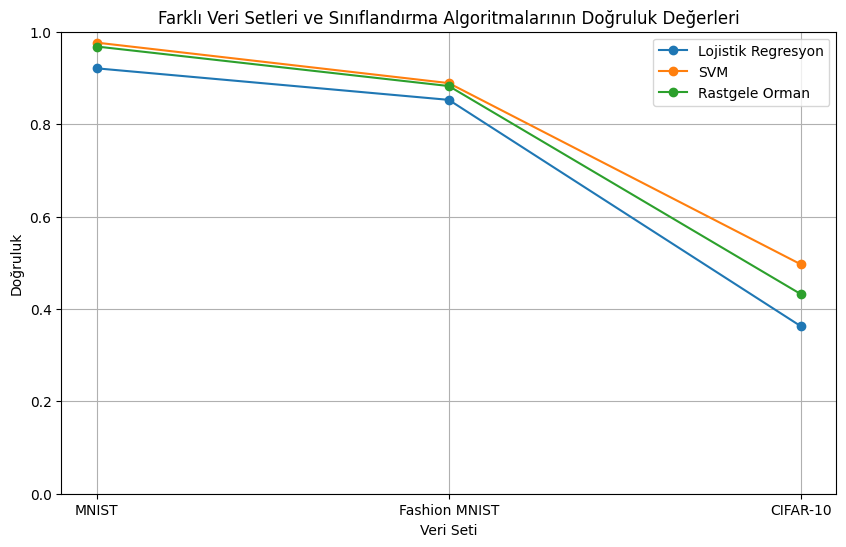

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# MNIST veri setini yükleme
mnist = fetch_openml('mnist_784', version=1)

# Fashion MNIST veri setini yükleme
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

# CIFAR-10 veri setini yükleme
cifar_10 = fetch_openml('CIFAR_10_small', version=1)

# Veri setlerini bir listede toplama
datasets = [(mnist, 'MNIST'), (fashion_mnist, 'Fashion MNIST'), (cifar_10, 'CIFAR-10')]

# Lojistik Regresyon, SVM ve Rastgele Orman modellerini eğitme ve doğruluk değerlerini kaydetme
models = ['Lojistik Regresyon', 'SVM', 'Rastgele Orman']
accuracies = {model: [] for model in models}

for data, name in datasets:
    X, y = data['data'], data['target']
    X = X / 255.0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
    accuracies['Lojistik Regresyon'].append(log_reg_accuracy)

    svm = SVC()
    svm.fit(X_train, y_train)
    svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
    accuracies['SVM'].append(svm_accuracy)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
    accuracies['Rastgele Orman'].append(rf_accuracy)

# Doğruluk değerlerini görselleştirme
plt.figure(figsize=(10, 6))

for model in models:
    plt.plot([name for _, name in datasets], accuracies[model], marker='o', label=model)

plt.title('Farklı Veri Setleri ve Sınıflandırma Algoritmalarının Doğruluk Değerleri')
plt.xlabel('Veri Seti')
plt.ylabel('Doğruluk')
plt.ylim(0.0, 1.0)
plt.legend()
plt.grid(True)
plt.show()